# Work with Missing Data
Over the last few decades, Machine Learning (ML) has gained immense popularity in solving real world business problems. It has emerged as a technology tool for companies looking to boost productivity and profit. ML practitioners source real world data and write algorithms to solve business problems. The success of the ML algorithms depends on the quality of the data. The data must be free from errors and discrepancies. It must adhere to a specific standard so that ML algorithms can accept them. But, this does not happen in reality.

In reality, the data has its own limitations. The data is dirty. It is incomplete, noisy and inconsistent. Incomplete data means it has missing values and lacks certain attributes. The data may be noisy as it contains errors and outliers and hence does not produce desired results. Lastly, the data may be inconsistent as it contains discrepancies in data or duplicate data.

So, ML practitioners must take actions to transform raw data into standardized data that is suitable for ML algorithms. It involves cleaning, transforming and standardizing data to remove all the inadequacies and irregularities in the data. These actions are collectively known as Data Preprocessing.

## Table of Contents

1. Import Libraries
2. Read Dataset
3. Check Missing Data
    1. Transform missing values to Nan for unknown values.
    2. Check NaN Values Count.
4. Drop Missing Data
5. Fill Missing data with Pandas
    - For Numerical Data
        * Mean
        * Median
        * Mode or Most frequent
    - For Categorical Data
        * Mode or Most frequent
6. Fill Missing data with Sklearn Imputer
    - SimpleImputer
        * Mean
        * Median
        * Mode or Most frequent
    - KNNImputer

## 1) Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

## 2) Read Dataset

First to read data successfully, analyize it first and know what is the seperator and what is the NaN indicators charchters if found.

In [3]:
df = pd.read_csv('../dastasets/wiki4HE.csv', sep=';')
df

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5,1,21,2,?,?,2,0,...,2,2,2,2,2,?,?,?,?,?
909,53,0,6,0,25,2,?,?,6,0,...,4,4,3,3,4,4,4,4,1,1
910,39,0,5,1,9,2,?,?,4,0,...,2,5,4,3,?,5,5,5,4,1
911,40,0,3,1,10,2,?,?,2,0,...,5,1,5,2,2,4,4,2,1,1


### 1. Transform missing values to `Nan` for unknown values.

In [7]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column AGE
------------------

43    49
39    44
42    44
46    44
45    43
33    43
38    42
41    41
35    38
40    38
44    38
48    35
36    35
47    32
49    32
37    31
34    30
50    28
31    23
52    22
32    21
51    18
53    16
29    13
54    11
56    11
28    11
55    10
30     9
58     8
62     7
59     7
60     6
26     5
57     5
63     4
27     4
24     3
25     2
23     2
61     2
65     2
68     1
64     1
67     1
69     1
Name: AGE, dtype: int64


For column GENDER
------------------

0    525
1    388
Name: GENDER, dtype: int64


For column DOMAIN
------------------

6    361
1    183
4    137
5    101
3     73
2     56
?      2
Name: DOMAIN, dtype: int64


For column PhD
------------------

0    489
1    424
Name: PhD, dtype: int64


For column YEARSEXP
------------------

10    77
3     65
15    62
5     61
4     59
20    56
12    53
7     47
1     43
6     42
8     42
2     39
18    25
14    24
?     23
25    22
11    21
9     21
13    19
16    19
17    17
22

In [3]:
df = pd.read_csv('../dastasets/wiki4HE.csv', sep=';', na_values=['N/A', 'no', '?'])
df

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2.0,1,14.0,1,2.0,NaN,NaN,0.0,...,3.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0
1,42,0,5.0,1,18.0,1,2.0,NaN,NaN,0.0,...,2.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,4.0
2,37,0,4.0,1,13.0,1,3.0,NaN,NaN,0.0,...,1.0,5.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,3.0
3,40,0,4.0,0,13.0,1,3.0,NaN,NaN,0.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0
4,51,0,6.0,0,8.0,1,3.0,NaN,NaN,1.0,...,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5.0,1,21.0,2,NaN,NaN,2.0,0.0,...,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
909,53,0,6.0,0,25.0,2,NaN,NaN,6.0,0.0,...,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0
910,39,0,5.0,1,9.0,2,NaN,NaN,4.0,0.0,...,2.0,5.0,4.0,3.0,NaN,5.0,5.0,5.0,4.0,1.0
911,40,0,3.0,1,10.0,2,NaN,NaN,2.0,0.0,...,5.0,1.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0


Ok lets use another dataset

In [14]:
df = pd.read_csv('../dastasets/melb_data.csv')

In [15]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [16]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [18]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column Suburb
------------------

Reservoir             359
Richmond              260
Bentleigh East        249
Preston               239
Brunswick             222
                     ... 
Brookfield              1
Bacchus Marsh           1
Healesville             1
Whittlesea              1
Beaconsfield Upper      1
Name: Suburb, Length: 314, dtype: int64


For column Address
------------------

28 Blair St         3
13 Robinson St      3
2 Bruce St          3
1/1 Clarendon St    3
14 Arthur St        3
                   ..
255 Coppin St       1
1 Newry St          1
3/1 Mines Rd        1
27 Eyre St          1
1/17 Chatham Rd     1
Name: Address, Length: 13378, dtype: int64


For column Rooms
------------------

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64


For column Type
------------------

h    9449
u    3017
t    1114
Name: Type, dtype: int64


For column Price
------------------

1100000.0    1

## 3) Check Missing Data

In [19]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

## 4) Drop Missing Data

This is the easiest method to handle missing values. In this method, we drop labels or columns from a data set which refer to missing values.

- drop labels or rows from a data set containing missing values
```python
df.dropna (axis = 0)
```
- drop columns from a data set containing missing values
```python
df.dropna(axis = 1)
```
- To drop a specific column from the dataframe if it has too much NaN values, we can use drop() method of Pandas dataframe.
```python
df.drop(‘col_name’, axis = 1)
```

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [21]:
df.dropna(axis = 0, inplace=True)

**check now**

In [23]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

## Fill Missing Data with pandas

In [25]:
df = pd.read_csv('../dastasets/melb_data.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [27]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [31]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [34]:
df['BuildingArea'].value_counts()

120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
113.81      1
134.60      1
82.60       1
165.50      1
477.00      1
Name: BuildingArea, Length: 602, dtype: int64

In [35]:
df['YearBuilt'].value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1901.0      1
1921.0      1
1898.0      1
1884.0      1
1897.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [18]:
df['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [19]:
df['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

### For Numerical Data

**Fill with Mean**

In [36]:
df['BuildingArea'].isnull().sum()

6450

In [37]:
df['BuildingArea'].mean()

151.96764988779805

In [38]:
df['BuildingArea'].fillna(df['BuildingArea'].mean(), inplace=True)

In [39]:
df['BuildingArea'].isnull().sum()

0

**Fill with Median**

In [40]:
df['YearBuilt'].isnull().sum()

5375

In [41]:
df['YearBuilt'].median()

1970.0

In [42]:
df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=True)

In [43]:
df['YearBuilt'].isnull().sum()

0

### For Categorical Data

**Fill with Mode (Most frequent)**<br>
could also used for numeric values

In [44]:
df['Car'].isnull().sum()

62

In [45]:
df['Car'].mode()

0    2.0
dtype: float64

In [46]:
df['Car'].mode()[0]

2.0

In [47]:
df['Car'].fillna(df['Car'].mode()[0], inplace=True)

In [48]:
df['Car'].isnull().sum()

0

another example

In [49]:
df['CouncilArea'].isnull().sum()

1369

In [50]:
df['CouncilArea'].mode()

0    Moreland
dtype: object

In [51]:
df['CouncilArea'].mode()[0]

'Moreland'

In [52]:
df['CouncilArea'].fillna(df['CouncilArea'].mode()[0], inplace=True)

In [53]:
df['CouncilArea'].isnull().sum()

0

## 6) Fill Missing Data with Sklearn Imputer
1. SimpleImputer
2. KNNImputer

In [54]:
df = pd.read_csv('../dastasets/melb_data.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [56]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### 1. Using SimpleImputer

**Fill with Mean**

In [57]:
df['BuildingArea'].isnull().sum()

6450

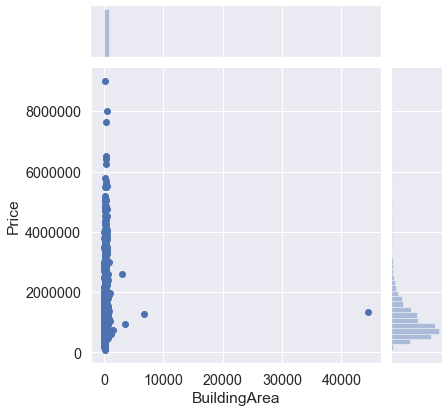

In [97]:
sns.jointplot(x='BuildingArea', y='Price', data=df)

as we saw there is outliers so it's **not a good practice** to use mean, but I use it as an example xD

In [59]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [60]:
df['BuildingArea'] = imputer.fit_transform(df[['BuildingArea']])

In [61]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [62]:
df['BuildingArea'].isnull().sum()

0

In [63]:
imputer.statistics_

array([151.96764989])

**Fill with Median**

In [64]:
df['YearBuilt'].isnull().sum()

5375

In [65]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [66]:
df['YearBuilt'] = imputer.fit_transform(df[['YearBuilt']])

In [67]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [68]:
df['YearBuilt'].isnull().sum()

0

In [69]:
imputer.statistics_

array([1970.])

**Fill with Mode (Most frequent)**

In [71]:
df['Car'].isnull().sum()

62

In [72]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [73]:
df['Car'] = imputer.fit_transform(df[['Car']])

In [74]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [75]:
df['Car'].isnull().sum()

0

In [76]:
imputer.statistics_

array([2.])

another example

In [78]:
df['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Maroondah              80
Knox                   80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [79]:
df['CouncilArea'].isnull().sum()

1369

In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [81]:
df['CouncilArea'] = imputer.fit_transform(df[['CouncilArea']])

In [82]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [83]:
df['CouncilArea'].isnull().sum()

0

In [84]:
imputer.statistics_

array(['Moreland'], dtype=object)

## 2. KNNImputer

The **KNNImputer** class provides imputation for completing missing values using the k-Nearest Neighbors approach.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

so you can say it's a smart way to calculate the mean but not from the whole data , just the nearest or similar data only.

<img src='https://www.coryjmaklin.com/media/machine-learning-algorithms-part-6-k-nearest-neighbors-in-python-2.png'>

In [85]:
df = pd.read_csv('../dastasets/melb_data.csv')

In [86]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [91]:
df['BuildingArea'].value_counts()

151.96765      6450
120.00000       114
110.00000        89
100.00000        88
130.00000        84
               ... 
9.00000           1
11.00000          1
180.56000         1
89.25000          1
44515.00000       1
Name: BuildingArea, Length: 603, dtype: int64

In [87]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [88]:
df['BuildingArea'] = imputer.fit_transform(df[['BuildingArea']])
df['BuildingArea'].isnull().sum()

0

In [89]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Great Work!